In [1]:
# Imports
import operator
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings

# dataset
from google.colab import drive

# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.exceptions import ConvergenceWarning

In [2]:
# Load Data
def load_data():
  drive.mount('/content/drive')

  df_training_set = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv').dropna()
  df_testing_set = pd.read_csv('/content/drive/MyDrive/kaggle/test.csv').dropna()

  return df_training_set, df_testing_set

In [3]:
# Get X,Y values from data
def get_xy_values(df_training_set, df_testing_set):
  x_train = df_training_set['x'].values.reshape(-1, 1)
  y_train = df_training_set['y'].values.reshape(-1, 1)
  x_test = df_training_set['x'].values.reshape(-1, 1)
  y_test = df_training_set['y'].values.reshape(-1, 1)

  return x_train, y_train, x_test, y_test

In [4]:
# Generate Polynomial Features
def generate_polynomial_features(X, degree):
    num_samples, num_features = X.shape
    X_poly = np.zeros((num_samples, num_features * degree))
    for i in range(num_samples):
        for j in range(num_features):
            for d in range(1, degree + 1):
                # Replace value at location with poly
                X_poly[i, j * degree + d - 1] = X[i, j] ** d
    return X_poly

In [6]:
def get_regression_analysis():
  # Initialize some stuff
  iterations = 100000
  run_types = ['train', 'test']
  reg_types = ['L1', 'L2', 'L12']
  reg_params = [random.uniform(0, 10) for _ in range(10)]
  polynomial_degrees = 5
  smallest_abs_error, smallest_squ_error, smallest_config = float('inf'), float('inf'), None

  # Get our initial data
  df_training_set, df_testing_set = load_data()
  x_train, y_train, x_test, y_test = get_xy_values(df_training_set, df_testing_set)

  # Ignore sklearn warnings
  warnings.filterwarnings("ignore", category=ConvergenceWarning)

  for run in run_types:
    for reg_param in reg_params:
      for reg_type in reg_types:
        for d in range(0, polynomial_degrees):

          # This lets me easily switch between datasets
          def switch(run_type):
            return {
                'train': (x_train, y_train),
                'test': (x_test, y_test)
            }.get(run_type, 'train')

          # Generate Polynomial Features
          x = switch(run)[0]
          y = switch(run)[1]
          polynomial_features = PolynomialFeatures(degree=d)
          x_poly = polynomial_features.fit_transform(x)

          # Figure out what kind of regularization to do
          if reg_type == 'L1':
            model = Lasso(alpha=reg_param, max_iter = iterations)
          elif reg_type == 'L2':
            model = Ridge(alpha=reg_param, max_iter = iterations)
          elif reg_type == 'L12':
            model = ElasticNet(alpha=reg_param, l1_ratio=0.5, max_iter = iterations)
          else: # None given
            model = LinearRegression()

          model.fit(x_poly, y)
          y_prediction = model.predict(x_poly)

          # Get errors and make updates as needed
          abs_error = mae(y, y_prediction)
          squ_error = mse(y, y_prediction)

          if abs_error < smallest_abs_error or smallest_abs_error == -1:
            smallest_abs_error = abs_error
            smallest_squ_error = squ_error
            smallest_config = {'reg_type': reg_type, 'reg_param': reg_param, 'polynomial_degrees': d}
            smallest_x, smallest_y, smallest_y_prediction = x, y, y_prediction

  # Plot the best configuration
  print("Lowest Error Obtained:")
  print(f"absolute error: {smallest_abs_error}. squared error: {smallest_squ_error}.\n")

  plt.scatter(smallest_x, smallest_y)
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(smallest_x, smallest_y_prediction), key=sort_axis)
  smallest_x, smallest_y_prediction = zip(*sorted_zip)
  plt.plot(smallest_x, smallest_y_prediction, color='m')
  plt.title(smallest_config)
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.51314e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.03158e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.20202e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.44013e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Lowest Error Obtained:
absolute error: 2.2271536714188254. squared error: 7.867752736510159.



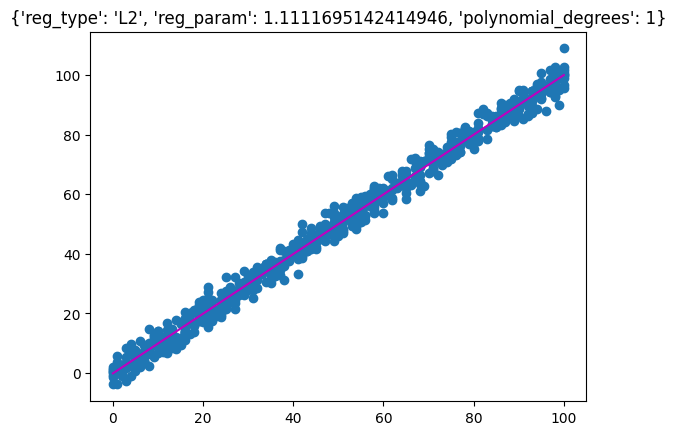

In [7]:
get_regression_analysis()